<a href="https://colab.research.google.com/github/RandomAnass/TDA-DL/blob/main/TDA_DL_report_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation :

In [ ]:
%%capture
!pip install gudhi 
!pip install kmapper

In [ ]:
%%capture
#not important
!pip install networkx
!pip install cython
!pip install ripser

In [ ]:
import gudhi
import matplotlib.pyplot as plt
import numpy as np

# TDA :

## Metric spaces

*   Distance
*   Hausdorff Distance: [*](https://colab.research.google.com/drive/1P1nACQWtOYf8zLkdL8Mj8wjJsZ59XWhx#scrollTo=yiH9cvminN7o&line=1&uniqifier=1)


> For $A, B$ two compact subsets of M : $d_{H}(A,B)\overset{\mathrm{def}}{=}\underset{δ>0}{min}\{\left(\forall a \in A,\exists b \in B, \rho (a,b) \leq δ \right) \land \left( \forall b \in B,\exists a \in A, \rho (a,b) \leq δ \right) \}\overset{\mathrm{𝟏}}{=} max\{\underset{b \in B}{sup} (d(b,A)),\underset{a \in A}{sup} (d(a,B)) \}\overset{\mathrm{𝟐}}{=} \underset{x \in M}{sup}| d(x,A)-d(x,B) |$





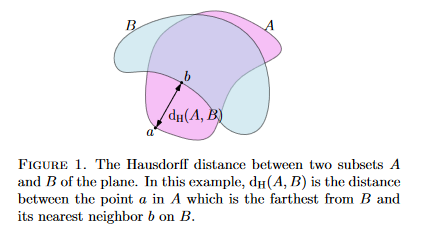

We didnt prove that Hausdorff Distance is actually a distance : 
* Symmetric ✅
* If $d_{H}(A,B)=0, then ~ ~\underset{b \in B}{sup}~~{d(b,A)} =\underset{a \in A}{sup}~~{d(a,B)} =0$ which means : $ \forall a \in A : d(a,B)=0$ And since B is a compact then $ \forall a \in A : a \in B$. And the same with $ \forall b \in B : d(b,A)=0$ gives $ \forall b \in B : b \in A$ . So $A = B$
* Let A, B and C three compacts, we will prove that : $d_{H}(A,B) \leq d_{H}(A,C) + d_{H}(C,B)$. Without loss of generality, let's suppose that $max\{\underset{b \in B}{sup} (d(b,A)),\underset{a \in A}{sup} (d(a,B))\}=\underset{a \in A}{sup} (d(a,B))$ 
. For $a \in A$, $b \in B$ and $c \in C$, we have $ d(a,b) \leq d(a,c) + d(c,b) $ then with inf on B: $ d_{B}(a) \leq d(a,c) + d_{B}(c) \leq d(a,c) + d_{H}(B,C) $ avec l'inf sur C :  $d_{B}(a) \leq  \underset{c \in C}{inf}~~d(a,c) + d_{H}(B,C) = d_{C}(a)+ d_{H}(B,C) \leq  d_{H}(A,C)+ d_{H}(B,C)  $ , with the sup on A, now we get : $\underset{a \in A}{sup} (d(a,B)) \leq d_{H}(A,C)+ d_{H}(B,C)  $ So : $d_{H}(A,B) \leq d_{H}(A,C) + d_{H}(C,B)$.


It provides a good way of quantifying the proximity between two data points (from the same space).

### Example of Hausdorff distance : 

In [ ]:
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),(0.0, 1.0),(-1.0, 0.0),(0.0, -1.0)])
v = np.array([(2.0, 0.0),(0.0, 2.0),(-2.0, 0.0),(0.0, -4.0)])

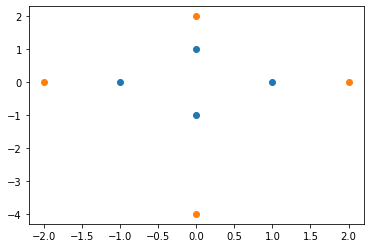

In [ ]:
plt.scatter(u[:,0], u[:,1])
plt.scatter(v[:,0], v[:,1])
plt.show()

[scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html) : Compute the directed Hausdorff distance between two N-D arrays. Distances between pairs are calculated using a Euclidean metric.

In [ ]:
directed_hausdorff(u, v)

(2.23606797749979, 3, 0)

In [ ]:
directed_hausdorff(v, u)

(3.0, 3, 3)

Hausdorff distance : 

In [ ]:
max(directed_hausdorff(u, v)[0], directed_hausdorff(v, u)[0])

3.0

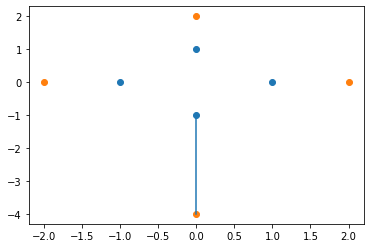

In [ ]:
plt.scatter(u[:,0], u[:,1])
plt.scatter(v[:,0], v[:,1])
plt.plot([u[3][0],v[3][0]],[u[3][1],v[3][1]])
plt.show()

### Generalization : Gromov Hausdorff distance 

> How far from being isometric
 (will be used to study the stability...)


## Simplicial complexes: 

Higher dimensional version of neighboring graphs. ( ▶ identify new features : cycles, voids ...)

⚛ A **simplicial complex** $\mathcal{K}$ is a set of simplices that satisfies the following conditions:
1. Every face of a simplex from $\mathcal{K}$ is also in $\mathcal{K}$.
2. The non-empty intersection of any two simplices $\sigma_1, \sigma_2 \in \mathcal{K}$ is a face of both $\sigma_1$ and $\sigma_2$. [*](https://colab.research.google.com/drive/1P1nACQWtOYf8zLkdL8Mj8wjJsZ59XWhx#scrollTo=cT3NUU-TnIzW&line=1&uniqifier=1)

* A [simplex](https://en.wikipedia.org/wiki/Simplex) is a generalization of the notion of a triangle or tetrahedron to arbitrary dimensions.

For example :
* a 0-simplex is a point,
* a 1-simplex is a line segment,
* a 2-simplex is a triangle,
* a 3-simplex is a tetrahedron,

⚛ A **k-simplex** is the convex hull of its k&nbsp;+&thinsp;1 Vertex . More formally, suppose the k&nbsp;+&thinsp;1 points $u_0, \dots, u_k \in \mathbb{R}^{k}$ are affinely independent, which means $u_1 - u_0,\dots, u_k-u_0$are linearly independent.
Then, the simplex determined by them is the set of points : $ C = \left\{\theta_0 u_0 + \dots +\theta_k u_k ~\Bigg|~ \sum_{i=0}^{k} \theta_i=1 \mbox{ and } \theta_i \ge 0 \mbox{ for } i = 0, \dots, k\right\}$

⚛ A set of points in a Euclidean space is defined to be convex if it contains the line segments connecting each pair of its points. The convex hull of a given set $X$ may be defined as :
* The (unique) minimal convex set containing $X$
* The intersection of all convex sets containing $X$
* The set of all convex combinations of points in $X$
* The union of all simplices with vertices in $X$

⚛ The convex hull of any nonempty subset of the n&nbsp;+&thinsp;1 points that define an n-simplex is called a face of the simplex. Faces are simplices themselves. In particular, the convex hull of a subset of size m&nbsp;+&thinsp;1 (of the n&nbsp;+&thinsp;1 defining points) is an m-simplex, called an m-face of the n-simplex. The 0-faces (i.e., the defining points themselves as sets of size 1) are called the vertices(singular: vertex), the 1-faces are called the edges, the (n&nbsp;−&thinsp;1)-faces are called the facets, and the sole n-face is the whole n-simplex itself. 

|   | 0-faces (vertices)| 1-faces(edges) | 2-faces(faces)  |  3-faces(cells) | 4-faces|
|---|---|---|---|---|---|
|  0-simplex (point)  |  1 |   |   |   | |
| 1-simplex (line segment)  |  2 |  1 |   |   | |
|  2-simplex (triangle)  | 3  |  3 |  1 |   | |
|  3-simplex (tetrahedron)   | 4  | 6  |  4 |  1 | |
|  4-simplex (5-cell)  | 5  |  10 | 10  |  5 | 1 |

It's a Pascal triangle

### Convex hull:

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

rng = np.random.default_rng()
n=50
points = rng.random((n, 2)) 
# points = rng.standard_normal((n, 2))  
hull = ConvexHull(points)

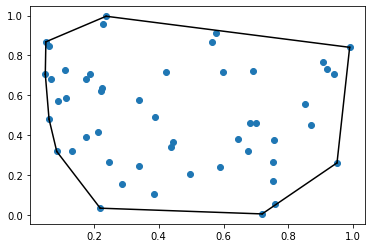

In [ ]:

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
  plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

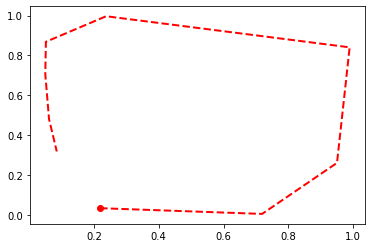

In [ ]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

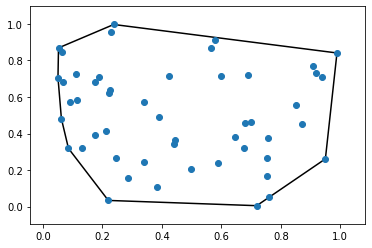

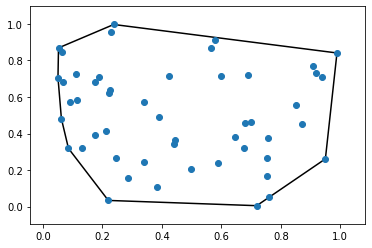

In [ ]:
convex_hull_plot_2d(hull)

3D : 

(3,)


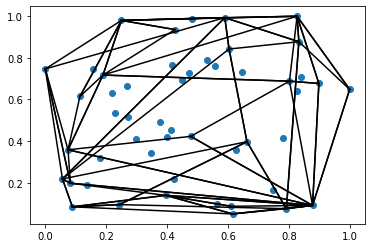

In [ ]:
rng = np.random.default_rng()
points = rng.random((n, 3))   # 30 random points in 2-D
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
  plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
print(points[0].shape)

Just a projection is showed

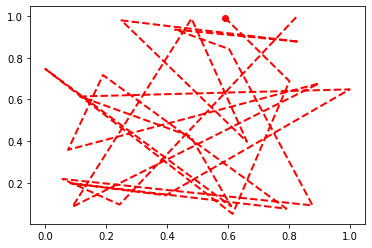

In [ ]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

Not what we are supposed to have.

A 3D example, inspired from [this 3D example](https://stackoverflow.com/questions/27270477/3d-convex-hull-from-point-cloud).

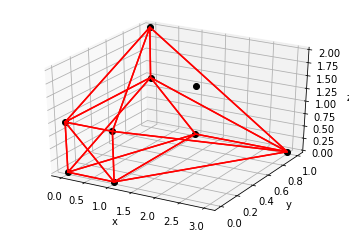

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# points 
pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [3, 1, 0],
                [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1],[0, 1, 2]])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# faces :
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

## Building simplicial complexes from data :

### Vietoris-Rips complex : 
Given a set of points $𝕏$, Vietoris-Rips complex $Rips_{α}(𝕏)$ is the set of simplices $[x_{0},...,x_{k}]$ such that $\forall (i,j) ~~d_{𝕏}(x_{i},x_{j}) \leq α$

(it doesnt not always admit a geometric realization in $ℝ^{d}$, even if 𝕏 is a finite subset of 𝕏.)

### Čech complex : 
Čech complex is the set of simplices $[x_{0},...,x_{k}]$ such that the k+1 closed $B(x_{i},α)$ have a non-empty intersection.


* Skeleton : set of vertices and edges.

The next image was taken from this [video](https://youtu.be/h0bnG1Wavag)

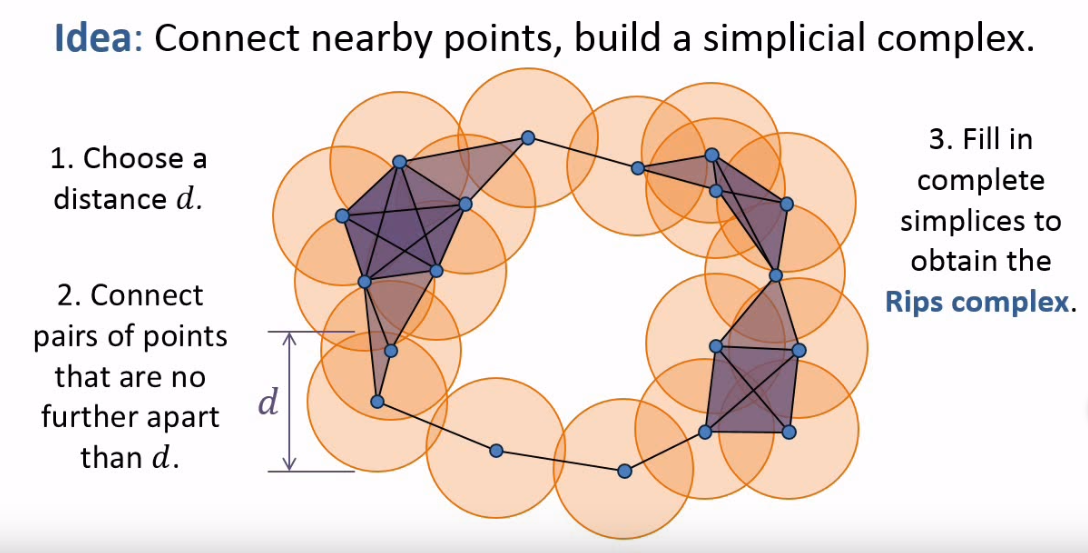

### The library Gudhi: 

In [ ]:
rips_complex = gudhi.RipsComplex(points=[[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]],
                                 max_edge_length=12.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 1 - 18 simplices - 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[4, 6] -> 9.49
[3, 6] -> 11.00


In [ ]:
rips_complex = gudhi.RipsComplex(points=[[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]],max_edge_length=12.0, sparse=2)

### The nerve theorem :

*   Homeomorphism 

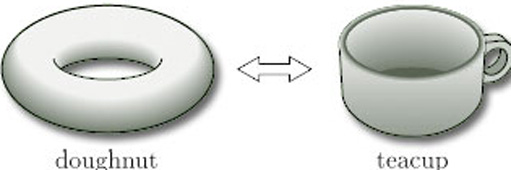
*   Homotopy (homotopy equivalence) : A homotopy equivalence between X and Y is a pair of continuous maps $f :X → Y $ and $g : Y → X$, such that $g∘f$ is homotopic to the identity map $id_X$ and  $f∘g$ is homotopic to $id_Y$.
*   X is contractible if it's homotopy equivalent to a one-point space.
*   Isotopy (isotopy equivalence)
*   Isotopy is stronger than homeomorphism
*   Homotopy equivalence is weaker than homeomorphism :  Two continuous functions from one topological space to another are called homotopic if one can be "continuously deformed" into the other. A homeomorphism is a special case of a homotopy equivalence, in which $g∘f$ is equal to the identity map id<sub>X</sub> (not only homotopic to it), and $f∘g$ is equal to id<sub>Y</sub>.
Therefore, if X and Y are homeomorphic then they are homotopy-equivalent, but the opposite is not true. [Some examples](https://en.wikipedia.org/wiki/Homotopy) :

* A solid disk (convex set) is homotopy-equivalent (contractible) to a single point, since you can deform the disk along radial lines continuously to a single point. However, they are not homeomorphic, since there is no bijection between them (since one is an infinite set, while the other is finite).
* A 2-dimensional cylinder and a Möbius strip.


Let $X$ be a topological space and $C$ be a family of open subsets $U_i$ of $X$ indexed by $i \in I$. The **nerve** of $C$is a set of finite subsets of the index-set $I$. It contains all finite subsets $J\subseteq I$ such that the intersection of the $U_i$ whose subindices are in $J$ is non-empty: $N(C) :=  \bigg\{J\subseteq I: \bigcap_{j\in J}U_j \neq \varnothing, J \text{ finite set} \bigg\}.$
The set $N(C)$ is often called the nerve complex of $C$.

Generally a nerve theorem is a theorem that gives sufficient conditions on C guaranteeing that $N(C)$ reflects, in some sense, the topology of X. 


**Theorem :**
If any intersection of sets in $N(C)$ is contractible, then $N(C)$ is homotopy-equivalent to X.



An other nerve theorem relates to the Čech nerve : 

> if $X$ is compact and all intersections of sets in C are contractible or empty, then the space $|S(\pi_0(C))|$ is homotopy-equivalent to $X$. [*To check*](https://ncatlab.org/nlab/show/nerve+theorem)



### Simplex tree :

A [simplex tree](https://hal.inria.fr/hal-00707901v1/document) : 🎄
The simplicial complex $Κ$ can be defined as a collection of words on an alphabet of size |V|, with V its vertex set
To compactly represent the set of simplices of  $Κ$, we store the corresponding words in a tree satisfying the following propertie : 


1.   The nodes of the simplex tree are in bijection with the simplices (of all dimensions) of the complex. The root is associated to the empty face.
2.   Each node of the tree, except the root, stores the label of a vertex. Specifically, a node N associated to simplex $σ \neq \emptyset$ stores the label of vertex last(σ).



[Simplex trees](https://gudhi.inria.fr/python/latest/simplex_tree_user.html#)

In [ ]:

st = gudhi.SimplexTree()
if st.insert([0, 1]):
    print("[0, 1] inserted")
if st.insert([0, 1, 2], filtration=4.0):
    print("[0, 1, 2] inserted")
if st.find([0, 1]):
    print("[0, 1] found")
result_str = 'num_vertices=' + repr(st.num_vertices())
print(result_str)
result_str = 'num_simplices=' + repr(st.num_simplices())
print(result_str)
print("skeleton(2) =")
for sk_value in st.get_skeleton(2):
    print(sk_value)

[0, 1] inserted
[0, 1, 2] inserted
[0, 1] found
num_vertices=3
num_simplices=7
skeleton(2) =
([0, 1, 2], 4.0)
([0, 1], 0.0)
([0, 2], 4.0)
([0], 0.0)
([1, 2], 4.0)
([1], 0.0)
([2], 4.0)


Let's make an example of our own.

In [ ]:
tree = gudhi.SimplexTree()
tree.insert([0, 1, 5])

#this gives us all the vertices and simplices, without considering the dimention
result_str = 'num_vertices=' + repr(tree.num_vertices())
print(result_str)
result_str = 'num_simplices=' + repr(tree.num_simplices())
print(result_str)

def n_simplices(tree, dim):
  simplices_dim = [i for i in list(tree.get_skeleton(dim)) if len(i[0])==dim+1]
  # we could have used get_simplices
  return len(simplices_dim)

def all_simplices(tree):
  return [i[0] for i in list(tree.get_simplices())]
result_str = 'num_vertices of dimension 2 =' + repr(n_simplices(tree,2))
print(result_str)

result_str = 'num_vertices of dimension 0 =' + repr(n_simplices(tree,0))
print(result_str)


print("skeleton(2) =")
for sk_value in [i[0] for i in list(tree.get_simplices())]:
    print(sk_value)



num_vertices=3
num_simplices=7
num_vertices of dimension 2 =1
num_vertices of dimension 0 =3
skeleton(2) =
[0, 1, 5]
[0, 1]
[0, 5]
[0]
[1, 5]
[1]
[5]


Let's try to make this one : 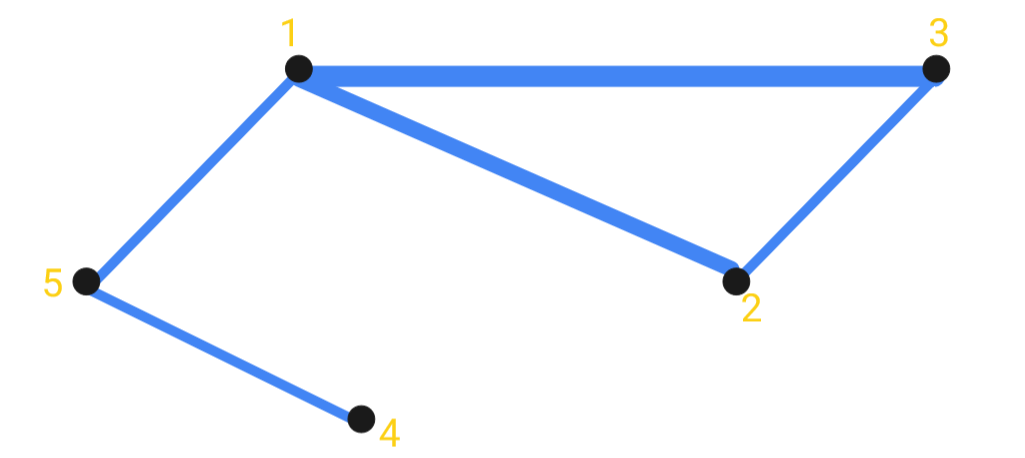

In [ ]:
tree = gudhi.SimplexTree()
tree.insert([1, 2, 3])
tree.insert([1, 5])
tree.insert([5, 4])

True

In [ ]:
for sk_value in list(tree.get_skeleton(2)):
    print(sk_value)

([1, 2, 3], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([1, 5], 0.0)
([1], 0.0)
([2, 3], 0.0)
([2], 0.0)
([3], 0.0)
([4, 5], 0.0)
([4], 0.0)
([5], 0.0)


We have 5 vertices, and 5 edges, and 1 face.

In [ ]:
result_str = 'num_vertices of dimension 2 =' + repr(n_simplices(tree,2))
print(result_str)

result_str = 'num_vertices of dimension 1 =' + repr(n_simplices(tree,1))
print(result_str)

result_str = 'num_vertices of dimension 0 =' + repr(n_simplices(tree,0))
print(result_str)


num_vertices of dimension 2 =1
num_vertices of dimension 1 =5
num_vertices of dimension 0 =5


In [ ]:
all_simplices(tree)

[[1, 2, 3], [1, 2], [1, 3], [1, 5], [1], [2, 3], [2], [3], [4, 5], [4], [5]]

#### Visualization

This part is fully inspired by this  [tutorial](https://gudhi.inria.fr/python/latest/_downloads/16cb4e6746ab0a6e8e9034624f89c895/plot_simplex_tree_dim012.py).

In [ ]:

# Coordinates of the points
points=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[1,1,0],[0,1,1]])

# List of triangles (point indices)
triangles = np.array([s[0] for s in tree.get_skeleton(2) if len(s[0])==3])
# List of edges (point coordinates)
edges = []
for s in tree.get_skeleton(1):
    e = s[0]
    if len(e) == 2:
        edges.append(points[[e[0],e[1]]])

## With plotly
import plotly.graph_objects as go
# Plot triangles
f2 = go.Mesh3d(
        x=points[:,0],
        y=points[:,1],
        z=points[:,2],
        i = triangles[:,0],
        j = triangles[:,1],
        k = triangles[:,2],
    )
# Plot points
f0 = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode="markers")
data = [f2, f0]
# Plot edges
for pts in edges:
    seg = go.Scatter3d(x=pts[:,0],y=pts[:,1],z=pts[:,2],mode="lines",line=dict(color='green'))
    data.append(seg)
fig = go.Figure(data=data,layout=dict(showlegend=False))
# By default plotly would give each edge its own color and legend, that's too much
fig.show()


With matplotlib we will make a function

In [ ]:
# With matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

  
def visual_tree(tree, points=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[1,1,0],[0,1,1]])):
  triangles = np.array([s[0] for s in tree.get_skeleton(2) if len(s[0])==3])
  edges = []
  for s in tree.get_skeleton(1):
      e = s[0]
      if len(e) == 2:
          edges.append(points[[e[0],e[1]]])
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  # Plot triangles
  ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=triangles)
  # Plot points
  ax.scatter3D(points[:,0], points[:,1], points[:,2])
  # Plot edges
  ax.add_collection3d(Line3DCollection(segments=edges))
  plt.show()

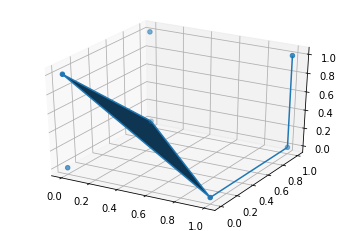

In [ ]:
visual_tree(tree)

In [ ]:
#We will add an other function for plotly, we might use it later
# With plotly
import plotly.graph_objects as go
 
def visual_tree_2(tree, points=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[1,1,1],[1,1,0],[0,1,1]])):
  triangles = np.array([s[0] for s in tree.get_skeleton(2) if len(s[0])==3])
  edges = []
  for s in tree.get_skeleton(1):
      e = s[0]
      if len(e) == 2:
          edges.append(points[[e[0],e[1]]])
  # Plot triangles
  f2 = go.Mesh3d(
          x=points[:,0],
          y=points[:,1],
          z=points[:,2],
          i = triangles[:,0],
          j = triangles[:,1],
          k = triangles[:,2],
      )
  # Plot points
  f0 = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode="markers")
  data = [f2, f0]
  # Plot edges
  for pts in edges:
      seg = go.Scatter3d(x=pts[:,0],y=pts[:,1],z=pts[:,2],mode="lines",line=dict(color='green'))
      data.append(seg)
  fig = go.Figure(data=data,layout=dict(showlegend=False))
  fig.show()


## The Mapper algorithm : 

[The Mapper algorithm](https://www.quantmetry.com/blog/topological-data-analysis-with-mapper/), Mapper is a combination of dimensionality reduction, clustering and graph networks techniques used to get higher level understanding of the structure of data. It is mainly used for: 

* Visualising the shape of data through a particular lens
* Detecting clusters and interesting topological structures which traditional methods fail to find 
* Selecting features that best discriminate data and for model interpretability



Notions :
* Pull back cover
* Refined pull back

### **The Algorithm :**

Given a dataset of points, the basic steps behind Mapper are as follows:

1.   Map to a lower-dimensional space using a filter or lens function $f$, or lens. Common choices for the filter function include projection onto one or more axes via PCA or density-based methods. 
2.   Construct a cover $(U_i)_{i\in I}$ of the projected space typically in the form of a set of overlapping intervals which have constant length.
3.   For each interval $U_i $ cluster the points in the preimage $f^{-1}(U_i) $ into sets $C_{i,1},\ldots,C_{i,k_i}$. (Compute the nerve of the cover of X defined by $C_{i,1},\ldots,C_{i,k_i}$)
4.   Construct the graph whose vertices are the cluster sets and an edge exists between two vertices if two clusters share some points in common.



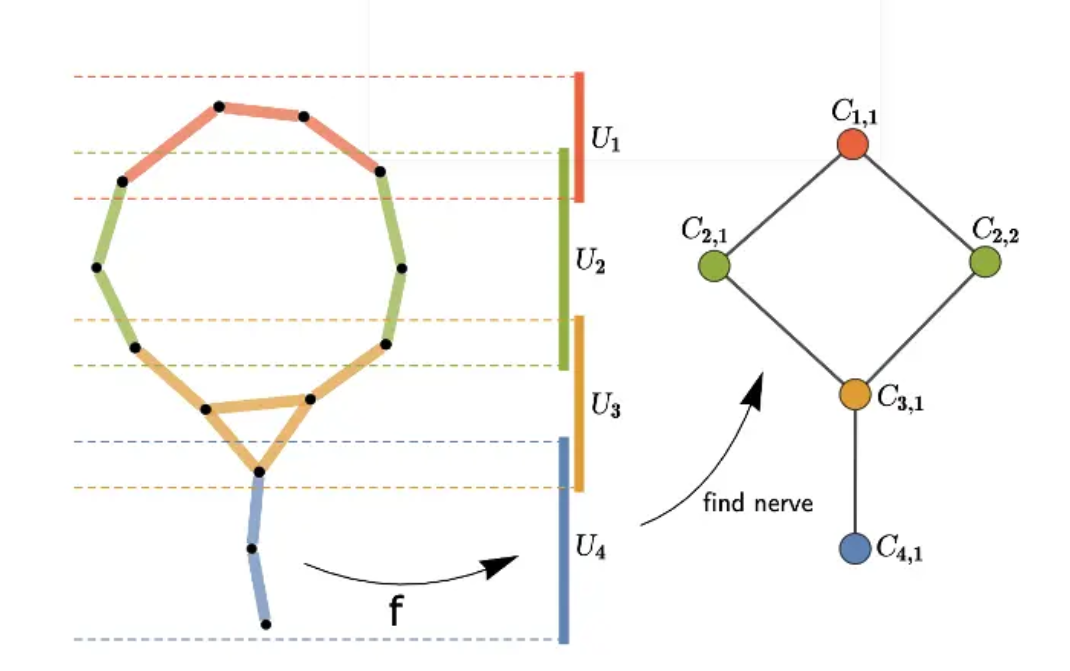

* The choice of $f$ : (Density, PCA...)
* The choice of the cover $U$
* The choice of the clusters



Some code examples： https://github.com/ksanjeevan/mapper-tda

## Geometric reconstruction and homology inference :



Given a set of points $𝕏_{n}=\{x_{0},...,x_{n}\} \subset ℝ^{d}$ :


1.    $𝕏_{n}$ is covered by a union of balls of a fixed radius centered on $x_{i}$.
2.   We use inferred topological features from the nerve of the union of balls, using the Nerve Theorem. 



* Manifolds 
* $ϕ$ Distance-like (proper + $||x||^{2}-ϕ^{2}(x)$ convex)
* $x$ is $α-critical$ if $||\nabla_{x}ϕ|| \leq α$
* $wfs_{ϕ}(r)$ : min r', such that there is no critical value between r and r+r' .
* Isotropy Lemma Grove
* Reconstruction Theorem (to prove homotopy equivalence)
* Combining the reconstruction Theorem and the Nerve Theorem



### Reconstruction example :

The data and the first part of the visualization is taken from the tutorial of  Mathieu Carrière [Here](https://github.com/MathieuCarriere/tda-tutorials/blob/mapper/Tuto-GUDHI-cover-complex.ipynb) with some changes.

There is a problem with the  
```python 
from gudhi.sklearn import CoverComplex
```
So we will use this [CoverComplex](https://gudhi.inria.fr/python/latest/nerve_gic_complex_ref.html)

In [ ]:
from gudhi import CoverComplex

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
X = np.loadtxt('https://raw.githubusercontent.com/MathieuCarriere/tda-tutorials/mapper/datasets/human.txt') # datasets/human.txt

In [ ]:
#print a part of the data, first 5 points
X[:5]

array([[-0.316455,  0.74334 ,  0.355125],
       [-0.321304,  0.760114,  0.357338],
       [ 0.108268,  0.495305,  0.23327 ],
       [-0.276274,  0.794365,  0.329099],
       [-0.230158,  0.791463,  0.301456]])

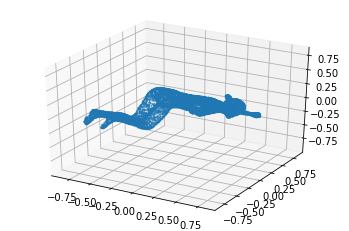

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[::2,1], X[::2,0], X[::2,2], s=1)
limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
origin = np.mean(limits, axis=1)
radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
x, y, z = origin
ax.set_xlim3d([x - radius, x + radius])
ax.set_ylim3d([y - radius, y + radius])
ax.set_zlim3d([z - radius, z + radius])
plt.show()

In [ ]:
%%capture
#note if we remove a line like set_color_from_coordinate, the code doesnt work
#It's not clear why?
nerve_complex = gudhi.CoverComplex()
nerve_complex.set_point_cloud_from_range(X)
nerve_complex.set_type('Nerve')
nerve_complex.set_color_from_coordinate(2)
nerve_complex.set_function_from_coordinate(2)
nerve_complex.set_graph_from_OFF()
nerve_complex.set_resolution_with_interval_number(10)
nerve_complex.set_gain(0.3)
nerve_complex.set_cover_from_function()
nerve_complex.find_simplices()
#nerve_complex.write_info()
simplex_tree = nerve_complex.create_simplex_tree()
nerve_complex.compute_PD()

In [ ]:
len(all_simplices(simplex_tree))

28776

In [ ]:
print("0-simplices : ",repr(n_simplices(simplex_tree,0)))

0-simplices :  22343


In [ ]:
len(X)

15910

To be able to visualize the simplex tree we need to have the number of points equal to the number of 0-simplices , which is not the case here, (some points were added). So we cant visualize the tree now , we have to see the problem later ⚠

In [ ]:
#visual_tree(simplex_tree,points=X)

We try the reconstruction with this [example](https://gudhi.inria.fr/python/latest/_downloads/a576e8d5cfd4a87afbc99f82c94a328b/plot_rips_complex.py) of Rips complex.

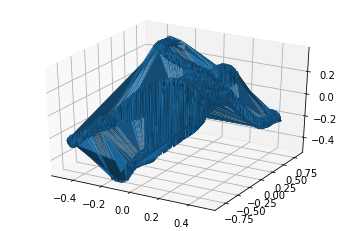

In [ ]:

triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], X[:,2], triangles=triangles)
plt.show()

Well, this is not what we expect, but it's normal. Because it's a Rips complex.

In [ ]:
rips_complex = gudhi.RipsComplex(points=X)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

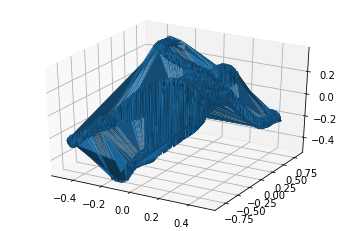

In [ ]:
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], X[:,2], triangles=triangles)
plt.show()

Its the same result (still weird). We tried to change the gain in set_gain and resolution in set_resolution_with_interval_number but it gives the same result.

## Homology

* We need more practical topological descriptors (easier than simplicial complices) 
▶ Numerical ones : homology groups

* Chains, cycles and boundaries : k-chain is a formal linear combination of the k-cells in a cell complex (k-chains are combinations of k-simplices). 
For a simplicial complex $X$, the group $C_n(X)$ of $n$-chains of $X$ is given by:
$C_n(X) = \{ \sum\limits_i m_i \sigma_i | m_i \in \mathbb{Z} \}$ where $\sigma_i$ are $n$-simplexes of $X$. Note that any element in $C_n(X)$ not necessary to be a connected simplicial complex.
* The boundary of a chain is the linear combination of boundaries of the simplices in the chain. The boundary of a k-chain is a (k−1)-chain. Note that the boundary of a simplex is not a simplex
* A chain is called a cycle when its boundary is zero. 
* A chain that is the boundary of another chain is called a boundary.

The k<sup>th</sup> [homology group](https://en.wikipedia.org/wiki/Simplicial_homology) H<sub>k</sub> of S is defined to be the quotient abelian group: $H_k(K) = Z_k/B_k\, $

#### Betti numbers :

The k<sup>th</sup> **Betti number** of K is the dimension $β_{k}(K)=dim H_k(K)$


**Interpretation** : 
the kth Betti number refers to the number of k-dimensional holes on a topological surface. A "k-dimensional hole" is a k-dimensional cycle that is not a boundary of a (k+1)-dimensional object.

The first few Betti numbers have the following definitions for 0-dimensional, 1-dimensional, and 2-dimensional simplicial complexes:

* b0 is the number of connected components;
* b1 is the number of one-dimensional or "circular" holes;
* b2 is the number of two-dimensional "voids" or "cavities".

An example : 
Let's take the [simplex tree](https://colab.research.google.com/drive/1P1nACQWtOYf8zLkdL8Mj8wjJsZ59XWhx#scrollTo=8D1pghW5annv) we had before : 

In [ ]:
tree = gudhi.SimplexTree()
tree.insert([1, 2, 3])
tree.insert([1, 5])
tree.insert([5, 4])


True

In [ ]:
tree.compute_persistence()

In [ ]:
tree.betti_numbers()

[1, 0]

It's 1,0,0,... because there is 1 connected component (the surface [1, 2, 3]) and no holes.

Let's see an other example :

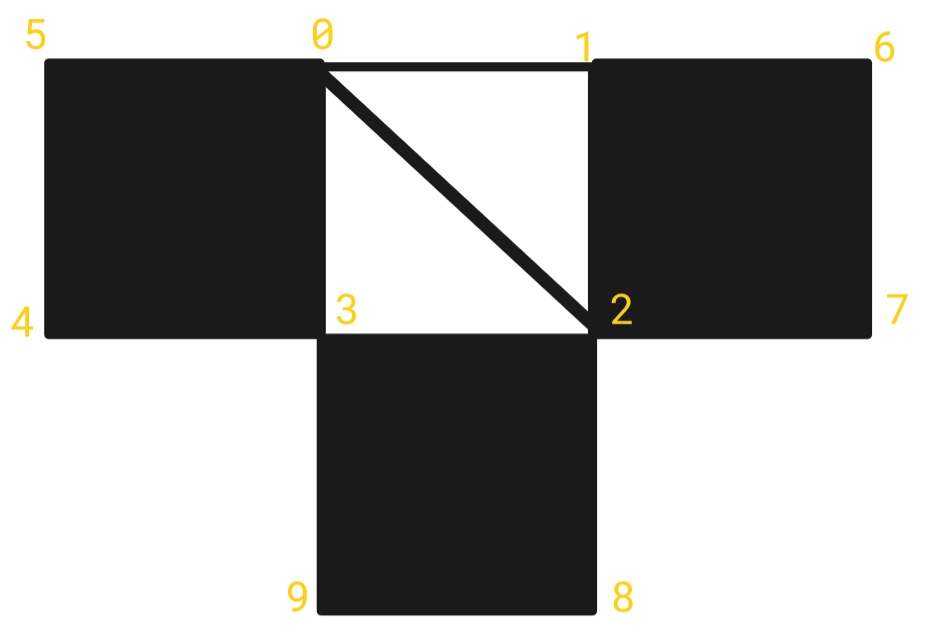

From the shape we can predict the result to be [3,2,0]

In [ ]:
tree = gudhi.SimplexTree()
tree.insert([0, 1])
tree.insert([1, 2])
tree.insert([2, 3])
tree.insert([3, 0])
tree.insert([2, 0])
tree.insert([1,6,7,2])
tree.insert([2,8,9,3])
tree.insert([3,4,5,0])

True

In [ ]:
print("0-simplices : ",repr(n_simplices(tree,0)))

0-simplices :  10


In [ ]:
tree_points=np.array([[0,0,0],[0,1,0],[-1,1,0],[-1,0,0],[-1,-1,0],[0,-1,0],[0,2,0],[-1,2,0],[-2,1,0],[-2,0,0]])
len(tree_points)

10

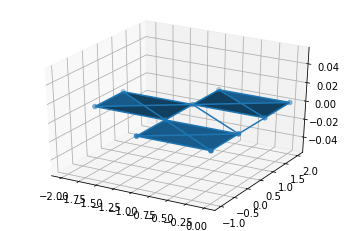

In [ ]:
visual_tree(tree,points=tree_points)


In [ ]:
visual_tree_2(tree,points=tree_points)


In [ ]:
tree.compute_persistence()

In [ ]:
tree.betti_numbers()

[1, 2, 0]

Actually the whole tree is connected so , we have 1  connected component , and not each surface is considered as connected.
So if we add a segment , we will have 2.

In [ ]:
tree.insert([10,11])
tree.compute_persistence()

In [ ]:
tree.betti_numbers()

[2, 2, 0]

✅

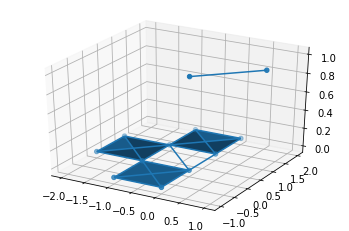

In [ ]:
#since 2 points were added 
tree_points=np.array([[0,0,0],[0,1,0],[-1,1,0],[-1,0,0],[-1,-1,0],[0,-1,0],[0,2,0],[-1,2,0],[-2,1,0],[-2,0,0],[0,0,1],[1,1,1]])
visual_tree(tree,points=tree_points)


* $H_k(K)$ and  $β_{k}(K)$ are topological invariants that's why they are interesting.

* Estimation of Betti numbers (theorem 3)

#### Poincaré polynomial :

The Poincaré polynomial of a surface is defined to be the generating function of its Betti numbers.  For example, the Betti numbers of the torus are 1, 2, and 1; thus its Poincaré polynomial is $1+2x+x^2$.

Can we find the Poincaré polynomial of a surface without knowing its Betti numbers though?


Betti and Euler 🆒 \\
A cool result is the relation between Betti's numbers and Euler's characteristic 
For a finite CW-complex K we have :
$\chi(K) = \sum_{i=0}^\infty(-1)^i b_i(K, F), \,$

where $\chi(K)$ denotes Euler characteristic of K and any field&nbsp;F.


Without going to details bout the [Euler characteristic](https://en.wikipedia.org/wiki/Euler_characteristic), here is just the classic definition we knew : 
$\chi=V-E+F $
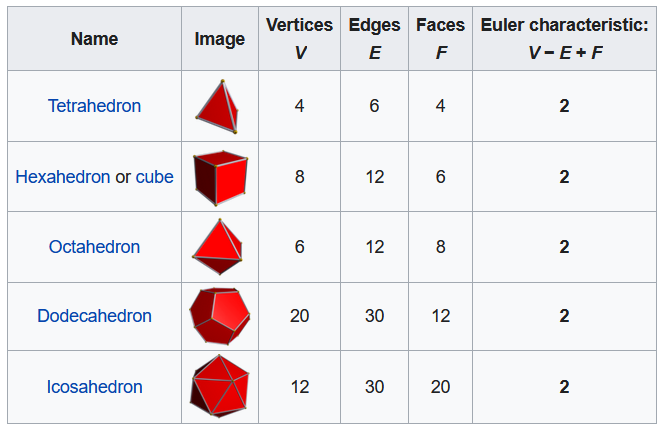

## Persistent Homology


*   Provides algorithms to compute the Betti numbers



### Filtrations : 




*   Filtration of a topological space
*   Filtration of a simplicial complex
*   Rips and Cech complexes are filtrations



### Persistent modules and persistence diagrams



*   **Persistence module**
*   **Persistence barcode**
*   **Persistence diagram** 
*   **Stability** is important here, stability of the barcodes and thus the diagrams if noise was added to the data. This property is useful especially since the data might come from measurements. We will see more about stability with **persistence landscape**.



Theorem 5 [Decomposition of a persistence module into a sum of interval modules, Betti number of filtration] 

Theorem 6 [Persistence diagram of a q-tame persistence module]

### Persistence landscape 

This approach aims at representing topological features in a Hilbert space, for which statistical learning methods can be directly applied. Takes what is in a persistence diagram and encode it with elements in a Hilbert space.

To summarize persistence diagrams into a clooection of linear functions



*   map(diagram, landscape) is Injective ➡ no information is lost
*   We now work on a functional space which opens up more tools.



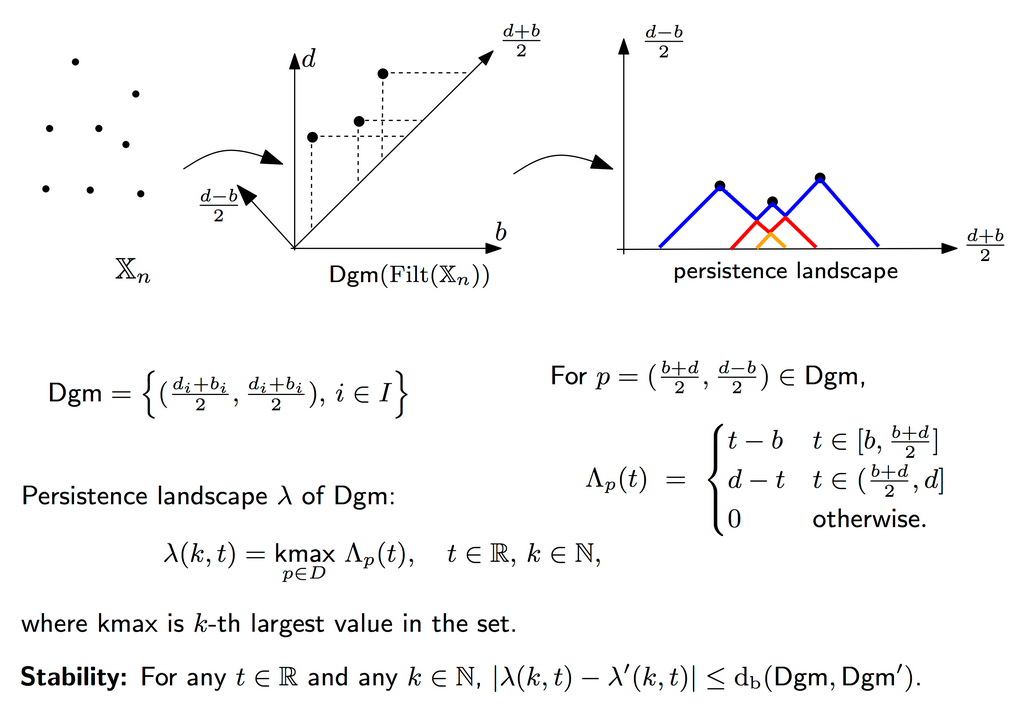



*   Persistence diagrams are stable when slightly perturbed.



We can apply this to one of the examples we saw before ,before doing this part we habe seen this [tutorial](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/Tuto-Part4.html) and this [documentation](https://gudhi.inria.fr/python/latest/persistence_graphical_tools_user.html).

In [ ]:
tree = gudhi.SimplexTree()
tree.insert([0, 1])
tree.insert([1, 2])
tree.insert([2, 3])
tree.insert([3, 0])
tree.insert([2, 0])
tree.insert([1,6,7,2])
tree.insert([2,8,9,3])
tree.insert([3,4,5,0])

True

usetex mode requires TeX.
/usr/local/lib/python3.7/dist-packages/gudhi/persistence_graphical_tools.py:369: UserWarning:

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.

/usr/local/lib/python3.7/dist-packages/gudhi/persistence_graphical_tools.py:369: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.



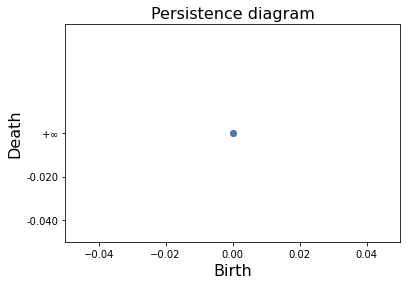

In [ ]:
diag = tree.persistence()
gudhi.plot_persistence_diagram(diag)
plt.show()

This is because the simplex tree is too simple. Now let's see with the human data.

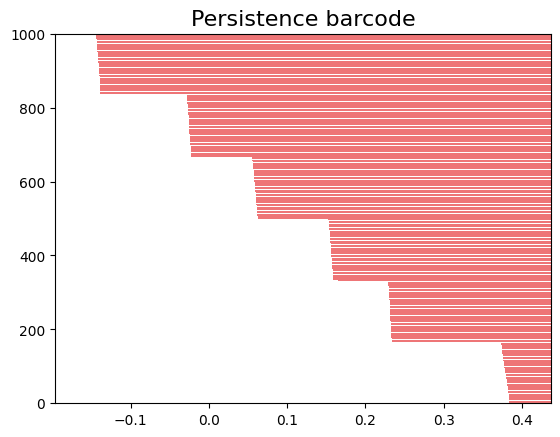

In [ ]:
diag = simplex_tree.persistence() #min_persistence=0.4

gudhi.plot_persistence_barcode(diag)
plt.show()

In [ ]:
#keep the diagram for later
diagram_human = diag

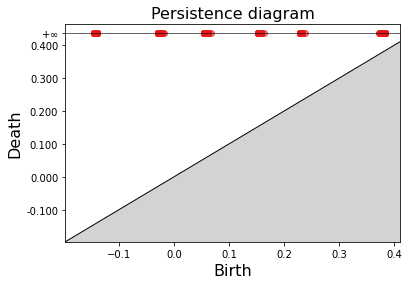

In [ ]:
gudhi.plot_persistence_diagram(diag)
plt.show()

Now this is interesting. We see that many births happen a the same time. It can be devided into six parts. How to interpret this? Maybe its the big parts of the body. (Note that we might have a problem here with infinity $∞$, death at infinity for all pairs). 

For the landscape this [documentation](https://gudhi.inria.fr/python/latest/representations.html) is helpful.

In [ ]:
from gudhi.representations.vector_methods import Landscape

l=Landscape(num_landscapes=6,resolution=1000).fit_transform(diag)
print(l)
#we also tried from gudhi.representations import Landscape

Maybe the problem here is because of the values $∞$.

In [ ]:
diag[:5]
#Note : there is actually more than 6 landscapes , but we can identify 6 groups

[(0, (-0.140183, inf)),
 (0, (0.156964, inf)),
 (0, (0.232034, inf)),
 (0, (0.380763, inf)),
 (0, (-0.140263, inf))]

We tried an other version of the landscape function from [here](https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/Intro_TDA_with_GUDHI_Part_2.html).

In [ ]:
def landscapes_approx(diag,p_dim,x_min,x_max,nb_nodes,nb_ld):
    """Compute a dicretization of the first nb_ld landscape of a 
    p_dim-dimensional persistence diagram on a regular grid on the 
    interval [x_min,x_max]. The output is a nb_ld x nb_nodes numpy
    array
    + diag: a persistence diagram (in the Gudhi format)
    + p_dim: the dimension in homology to consider
    """
    landscape = np.zeros((nb_ld,nb_nodes))
    diag_dim = []
    for pair in diag: #get persistence points for homology in dimension dim
        if (pair[0] == p_dim):
            diag_dim.append(pair[1])

    step = (x_max - x_min) / (nb_nodes - 1)
    for i in range(nb_nodes):
        x = x_min + i * step
        t = x / np.sqrt(2)
        event_list = []
        for pair in diag_dim:
            b = pair[0]
            d = pair[1]
            if b <= t <= d:
                if t >= (d+b)/2:
                    event_list.append((d-t)*np.sqrt(2))
                else:
                    event_list.append((t-b)*np.sqrt(2))
        event_list.sort(reverse=True)
        event_list = np.asarray(event_list)
        for j in range(nb_ld):
            if(j<len(event_list)):
                landscape[j,i]=event_list[j]

    return landscape

In [ ]:

nbld = 6 # number of Landscapes 
resolution = 1000
length_max = 0.3
ld_dim = 1 # landscape dim

p_dim=3 #we tried diffirent values for p_dim
L = landscapes_approx(diag,p_dim,0,length_max,resolution,nbld)
print(L)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#plt.plot(np.linspace(0,length_max * 1.1, num=resolution),L[0:nbld,:].transpose())

We will try this with a smaller data set, but only random.

In [ ]:
data = np.random.random((100,2))

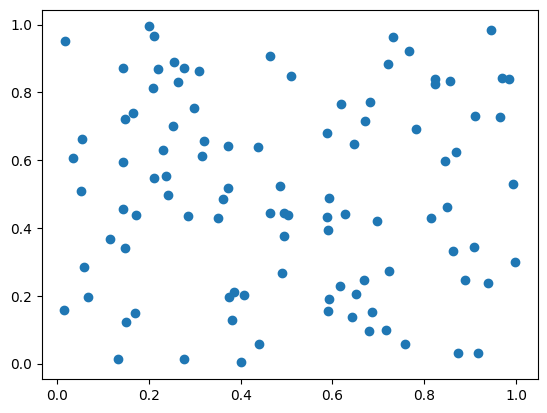

In [ ]:
plt.scatter(data[:,0],data[:,1])

In [ ]:
%%capture

small_complex = gudhi.CoverComplex()
small_complex.set_point_cloud_from_range(data)
small_complex.set_type('Nerve')
small_complex.set_color_from_coordinate(2)
small_complex.set_function_from_coordinate(2)
small_complex.set_graph_from_OFF()
small_complex.set_resolution_with_interval_number(10)
small_complex.set_gain(0.3)
small_complex.set_cover_from_function()
small_complex.find_simplices()
simplex_tree = small_complex.create_simplex_tree()
small_complex.compute_PD()

In [ ]:
print("0-simplices : ",repr(n_simplices(simplex_tree,0)))

0-simplices :  196


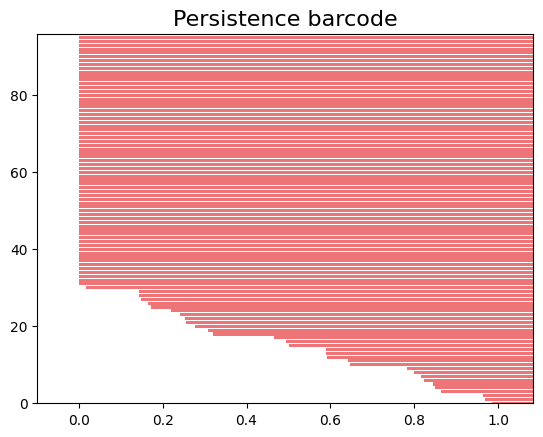

In [ ]:
diag = simplex_tree.persistence() #min_persistence=0.4
#to avoid the infinity problem we will remove x=infinity
#type(diag[0][1][1])
inf_ = diag[0][1][1]
diag2 = [i for i in diag if i[1][0] != inf_  ]

gudhi.plot_persistence_barcode(diag2)
plt.show()

In [ ]:
#keep the diagram 
diagram_random=diag2

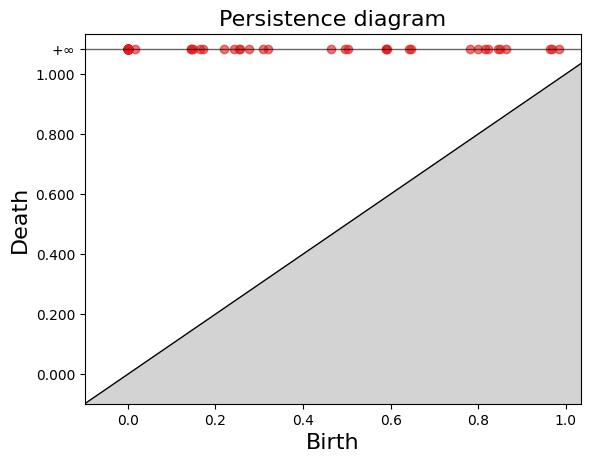

In [ ]:
gudhi.plot_persistence_diagram(diag2)
plt.show()

The landscape code is still not working , its probably because of the infinity values, also we have a lot of landscapes instead of a few. We will need to test an other data set.


When we were looking for packages to visualize the complexes , we found this one called [ripser](https://github.com/scikit-tda/ripser.py), for Rips complex, so we can show it here with the small random data we have. Note that : we tested this package for big data (more than 10000 of points) and its not functional , and it causes memory problems. So it wont be useful for us in the future.

### Here :

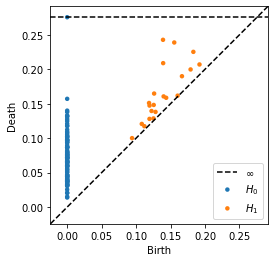

In [ ]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, show=True)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


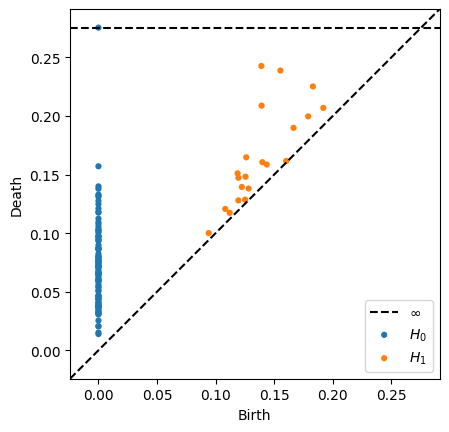

In [ ]:
import numpy as np
from ripser import Rips

rips = Rips()
diagrams = rips.fit_transform(data)
rips.plot(diagrams)

We have different results. this needs to be disscussed ⚠

 Persistence homology can be represented lineary thanks to :


*   Betti curves
*   Persistence surfaces
* Others..



To compare topological features we can compare persistence diagrams. For that we have two distances: 
* Bottleneck distance 
* Wasserstein distance (Considered to take into account also the distance between the other pairs of points not only the ones with the largest distance)

[Figures of example :](https://geomdata.sciencesconf.org/data/AnaTopDonnees_Cours.pdf)
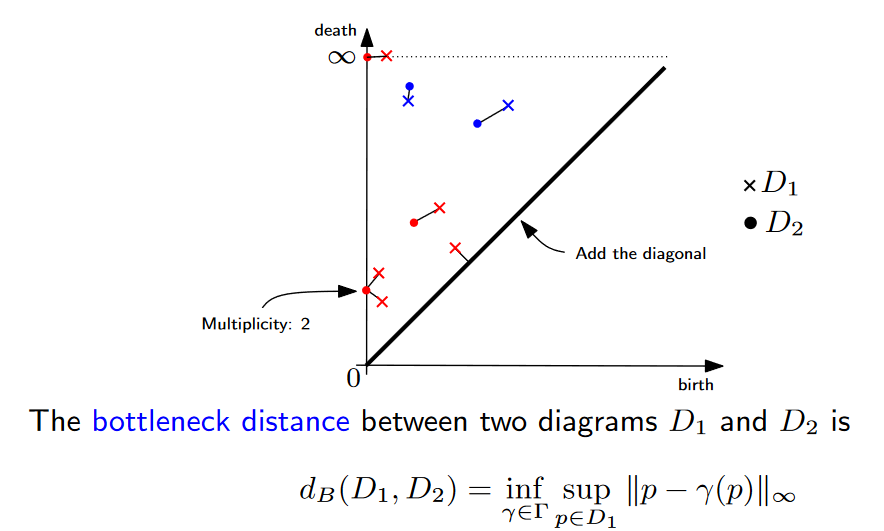

In [ ]:
#we couldnt compare the diagrams we had so , we will try with just some basic ones

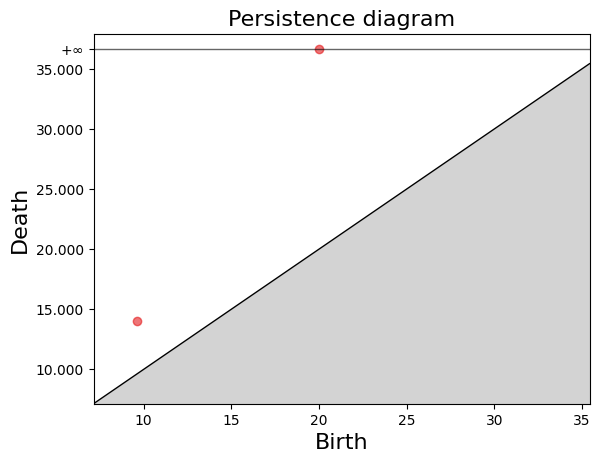

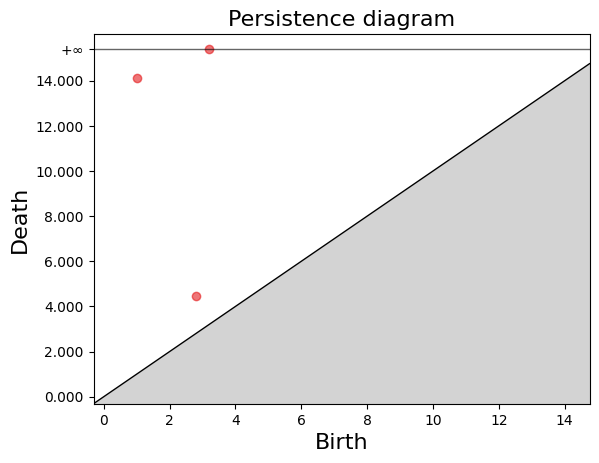

In [ ]:
import gudhi

diag1 = [[10, 3.7],[9.6, 14.],[34.2, 14.1], [20.,float('Inf')]]
diag2 = [[2.8, 4.45],[1, 14.1],[3.2,float('Inf')]]
gudhi.plot_persistence_diagram(diag1)
gudhi.plot_persistence_diagram(diag2)
plt.show()

In [ ]:
"Bottleneck distance approximation = " + '%.2f' % gudhi.bottleneck_distance(diag1, diag2, 0.1)

'Bottleneck distance approximation = 16.80'

In [ ]:
"Bottleneck distance value = " + '%.2f' % gudhi.bottleneck_distance(diag1, diag2)

'Bottleneck distance value = 16.80'

# Neural Networks for Persistence Diagram

* We will study The PersLay: A Neural Network Layer for Persistence Diagrams and New Graph Topological Signatures paper.
* Persistence diagrams encode topological properties of data but the metric space of persistence diagrams is not Hilbert, that's why they end up being difficult inputs for most Machine Learning techniques.
* The paper presents a new approach to learning vectorizations of persistence diagrams with the neural network  PersLay.
* Check part 2 of the project [Results_TDA.ipynb](https://github.com/RandomAnass/TDA-DL/blob/main/Results_TDA.ipynb)

## TDA-tutorials

*   [https://github.com/GUDHI/TDA-tutorial](https://github.com/GUDHI/TDA-tutorial)
*   [https://geometrica.saclay.inria.fr/team/Fred.Chazal/Barcelona2016/slides/PersistenceForTDA.pdf](https://geometrica.saclay.inria.fr/team/Fred.Chazal/Barcelona2016/slides/PersistenceForTDA.pdf)
* [http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA-Gudhi-Python.html](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA-Gudhi-Python.html)
* [In R](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/Persistence.html)


# Appendix : 

## Hausdorff distance :

* Hausdorff distance :


> **Proof :** -Without loss of generality, let's suppose that $max\{\underset{b \in B}{sup} (d(b,A)),\underset{a \in A}{sup} (d(a,B)) \}=\underset{b \in B}{sup} (d(b,A))$ Since $B\subset M, then $ $\underset{x \in M}{sup}| d(x,A)-d(x,B) | \geq \underset{x \in B}{sup}| d(x,A)-d(x,B) | = \underset{x \in B}{sup}| d(x,A)-0) | = \underset{b \in B}{sup}(d(b,A)). \\ $ On the other hand we have $\forall x \in M, \forall a \in A,\forall b \in B : |\rho (a,b)| \geq |\rho (x,a)-\rho (x,b)|$ ( by the triangle inequality) Then we apply the $\underset{a \in A}{inf} $ on the inequality, we get : $\forall x \in M,\forall b \in B : d(b,A) \geq min \{ d(x,A)-\rho (x,b),\rho (x,b) - \underset{a \in A}{sup} (\rho (x,a))  \}$, (with both parts bigger than zero). \\
 Then we apply the $\underset{b \in B}{sup} $ on the last inequality, we get : $\forall x \in M : \underset{b \in B}{sup}\{d(b,A)\} \geq min \{ d(x,A)-\underset{b \in B}{sup}(\rho (x,b)),\underset{b \in B}{sup}(\rho (x,b)) - \underset{a \in A}{sup} (\rho (x,a))  \}$ 

  Now we apply the $\underset{x \in M}{sup} $ on this one, we get : $ \underset{b \in B}{sup}\{d(b,A)\} \geq min \{ \underset{x \in M}{sup}(d(x,A))-\underset{x \in M}{inf}\underset{b \in B}{sup}(\rho (x,b)),\underset{x \in M}{sup}\underset{b \in B}{sup}(\rho (x,b)) - \underset{x \in M}{inf}\underset{a \in A}{sup} (\rho (x,a))  \}$, And we have that (by studying the sign of $d(x,A)-d(x,B)$ ) :   $ \underset{x \in M}{sup}| d(x,A)-d(x,B) | = max \{ \underset{x \in M}{sup}(d(x,A))-\underset{x \in M}{inf}\underset{b \in B}{inf}(\rho (x,b)),\underset{x \in M}{sup}(d(x,B) ) - \underset{x \in M}{inf}\underset{a \in A}{inf} (\rho (x,a))  \}$



---




 Let $x = \sup\limits_{a \in A, b \in B}f(a,b)$ and $y = \sup\limits_{a \in A}\sup\limits_{b\in B}f(a,b)$, where we assume that both exist. For each $a\in A$ let $y_a = \sup\limits_{b\in B}f(a,b)$; clearly all $y_a$ exist, $y = \sup\limits_{a\in A}y_a$, and of course $y_a \le y$ for each $a \in A$.

Fix $a_0 \in A$; $f(a,b) \le x$ for all $\langle a,b \rangle \in A \times B$, so in particular $f(a_0,b) \le x$ for all $b \in B$, and hence $y_{a_0} = \sup\limits_{b\in B}f(a_0,b) \le x$. Thus, $y_a \le x$ for all $a\in A$, and it follows that $y = \sup\limits_{a\in A} y_a \le x$. Suppose that $y<x$, and fix $z \in (y,x)$. By the definition of $x$ there is some $\langle a,b \rangle \in A \times B$ such that $f(a,b) > z$. But then we must have $y_a \ge f(a,b) > z > y$, which is absurd. Hence $x=y$.

## Simplicial Complexes:

* Simplicial Complexes : a **standard** n-simplex is the subset of $ℝ^{n+1}$ given by :
$\Delta^n =\{(x_1,x_2,\ldots,x_{n+1})\inℝ^{n+1}\mid x_i\ge 0 \text{ for all } i \text{ and } \sum_{i=1}^{n+1} x_i = 1\}$. (set of points whose components are all positive and sum to 1)

For $ℝ$ : $\Delta^0=\{1\}$. \\
$ℝ^2$ : 

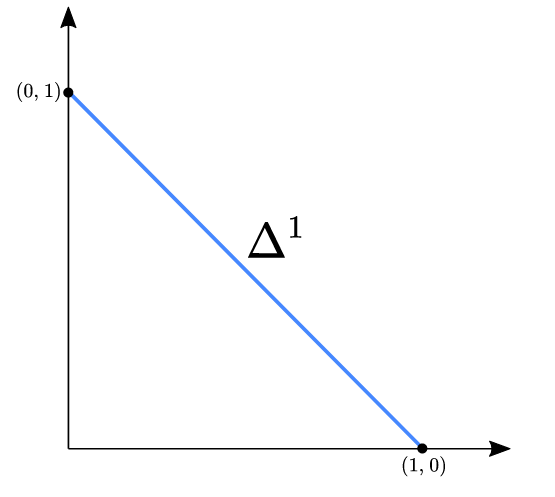

$ℝ^3$ :  The simplex $Δ^2$ is a triangle in $ℝ^3$  which contains its interior and is bounded by the line segments connecting the points (1,0,0), (0,1,0) and (0,0,1).

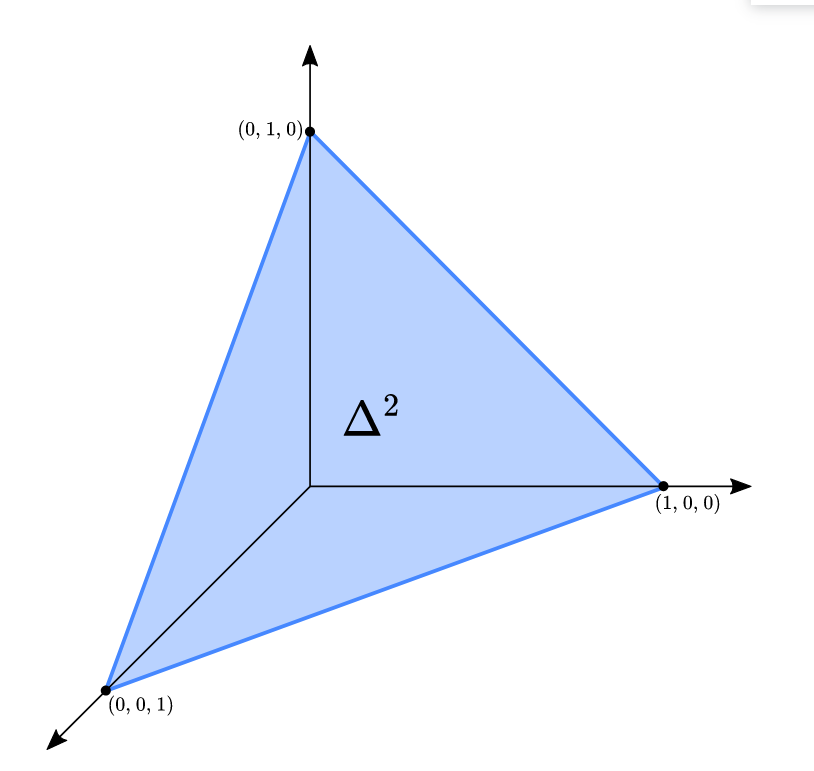


A simplicial complex X is a finite collection of simplices for which : 
1. If s is a simplex in X then every face of s is also in X.
2. If $s_1$ and $s_2$ are simplices in X then either they are disjoint or their intersection $s_1∩s_2$ is a face of both $s_1$ and $s_2$.

* The boundary of an n-simplex is always an (n−1)-chain!

* We define $\partial'_n(\sigma) = \partial'_n([v_0, v_1,\ldots, v_n])=\sum_{i=0}^n(-1)^i[v_0,\ldots,v_{i-1},v_{i+1},\ldots,v_n]$
* The boundary map of dimension n is the unique homomorphism 
$\partial_n:C_n(X)\to C_{n-1}(X)$  given by extending the function $∂′_n$ by linearity.
* $\cdots\xrightarrow{\partial_{n+1}} C_n(X)\xrightarrow{\partial_n} C_{n-1}(X)\xrightarrow{\partial_{n-1}}\cdots\xrightarrow{\partial_2}C_1(X)\xrightarrow{\partial_1}C_0(X)\xrightarrow{\partial_0}0$

* Proof of $(\partial_{n}\circ \partial_{n+1})(\sigma)=0$ : \begin{align*} 
\big(\partial_{n-1}\circ\partial_n\big)\left([v_0,\dotsc,v_n]\right)&=\sum_{i=0}^n(-1)^i\partial_{n-1}[v_0,\dotsc,v_{i-1},v_{i+1},\dotsc,v_n]\\ 
&= \sum_{j<i}(-1)^i(-1)^j[v_0,\dotsc,v_{j-1},v_{j+1},\dotsc,v_{i-1},v_{i+1},\dotsc,v_n]\\ 
&\phantom{==} +\sum_{j>i}(-1)^i(-1)^{j-1}[v_0,\dotsc,v_{i-1},v_{i+1},\dotsc,v_{j-1},v_{j+1},\dotsc,v_n]\\ 
&=0 
\end{align*}

## kmapper

https://kepler-mapper.scikit-tda.org/en/latest/notebooks/Plotly-Demo.html

https://github.com/scikit-tda/kepler-mapper

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 247 edges and 94 nodes in 0:00:00.334178.
Wrote visualization to: make_circles_keplermapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\

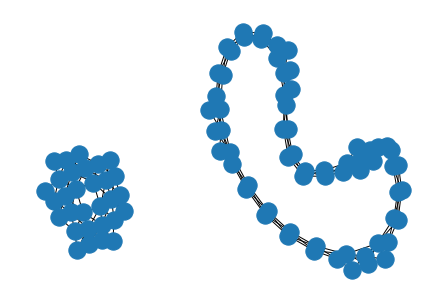

In [ ]:
# Import the class
import kmapper as km
import networkx as nx

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

#draw the graph
nx_graph = km.adapter.to_nx(graph)
nx.draw(nx_graph)
# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html", title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

In [ ]:
data[:10]

array([[ 0.01181207,  0.28515478],
       [ 0.48031922, -0.92160761],
       [-0.81650386, -0.55259169],
       ...,
       [-0.97796089,  0.22543099],
       [ 0.3253931 , -0.11381665],
       [-0.04442443, -1.02284757]])